In [1]:
# Check directory 
import os

print(os.getcwd())
print(os.listdir())

/Users/derphantomben/Documents/Coding/Portfolio
['NZ_earthquakes.csv', 'NHR7_Hikurangi-subduction-zone-FA__FocusFillWyItMC4wMiIsIi0wLjUxIiw1NzUsNDEyXQ.jpg', 'NZ Earthquake Count 2000 - 2024_All.png', 'df_major_quake_cty.csv', 'df_major_quakes.csv', 'MagnitudeVs.Depth.png', 'Untitled1.ipynb', '.DS_Store', 'images.jpeg', 'MergeFile.ipynb', 'il_fullxfull.3868885735_ml0m.webp', 'INTERACTIVE-How-are-earthquakes-measured.webp', 'df_quake_cty.csv', 'Hikurangi_map_projection.jpeg', 'EDA plots and visualization_2.ipynb', 'Untitled3.ipynb', 'Untitled.ipynb', 'All_Quakes_Scatter.png', 'NZ Earthquake Count 2000 - 2024_Mod-Ext.png', 'Untitled4.ipynb', 'seismic-risk-areas.jpg', 'NZT_Quake_Forecast_2024.pptx', 'NZ_earthquakes_24.csv', 'Prep_Mod_MergeFile_2.ipynb', 'NewEDA-Copy1.ipynb', 'Untitled2.ipynb', 'frame_1.png', 'QuakePredict_2.ipynb', 'frame_3.png', 'MagnitudeTypes_2000-2024.png', 'NewEDA.ipynb', 'plate-boundaries-800.jpg', 'exported_plot_2.html', 'frame_2.png', 'NewZealand_CardinalDirections

In [2]:
############################################
### Import modules for EDA### 
############################################

# Basic operations and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###################################################
# create interactive slide bar
from matplotlib.widgets import Slider

###################################################
#map projections
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from IPython.display import display

###################################################
# needed for drop down menus
from IPython.display import display
import ipywidgets as widgets

###################################################
# Create animation
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

###################################################
# Create tempo-spatial graph with earthquake frequency per cluster plotted against measured magnitudes 

import ipywidgets as widgets
from IPython.display import display
import matplotlib.dates as mdates
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
# Read earthquake data file
df_quake_cty = pd.read_csv('df_quake_cty_24.csv', low_memory=False) 
df_major_quakes = pd.read_csv('df_major_quakes.csv', low_memory=False) 

# Note: Added low_memory=False to process the file in chunks, which helps pandas determine the appropriate 
# data type for each column.

############################################
# First 5 rows of df
display(df_quake_cty)

display('-'*75)

display(df_major_quakes)

,Time,UnixTime,Longitude,Latitude,Magnitude,Magnitude Type,Depth,NZ_MMI,Adjusted Distance,Nearest City,Population,Cluster
0,2024-06-16 23:22:53.506000+00:00,1718580173,175.772568,-39.233845,1.0,MLv,83.97,Unnoticeable,7.644537,Turangi,3320,-1
1,2024-06-16 22:37:20.275000+00:00,1718577440,176.509384,-40.145943,2.6,MLv,36.21,Unnoticeable,3.228854,Havelock North,13950,-1
2,2024-06-16 22:34:42.955000+00:00,1718577282,174.214157,-39.881680,1.6,MLv,104.25,Unnoticeable,9.720427,Hawera,9792,-1
3,2024-06-16 22:30:25.906000+00:00,1718577025,176.168335,-38.031158,2.7,MLv,226.37,Unnoticeable,21.772175,Rotorua,54204,-1
4,2024-06-16 22:12:17.103000+00:00,1718575937,174.444122,-40.476860,2.5,MLv,27.59,Unnoticeable,2.437499,Paraparaumu Beach,9087,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
519458,2000-01-01 07:37:23.078000+00:00,946712243,176.644070,-38.168910,1.8,ML,5.00,Unnoticeable,0.588751,Kawerau,7080,-1
519459,2000-01-01 07:16:58.734000+00:00,946711018,174.739330,-40.965730,2.0,ML,32.97,Unnoticeable,2.497817,Porirua,55218,-1
519460,2000-01-01 04:29:06.088000+00:00,946700946,173.937740,-39.936440,3.6,ML,160.92,Weak,15.575452,Hawera,9792,-1
519461,2000-01-01 02:41:34.420000+00:00,946694494,174.324390,-40.990290,2.1,ML,54.14,Unnoticeable,4.956407,Wellington,216200,-1


'---------------------------------------------------------------------------'

,Time,UnixTime,Longitude,Latitude,Magnitude,Magnitude Type,Depth,NZ_MMI,Adjusted Distance,Nearest City,Population,Cluster
0,2024-06-16 21:17:02.885000+00:00,1718572622,145.008865,19.403189,5.0,Mw(mB),100.00,Moderate,70.402322,Kaitaia,5868,1
1,2024-06-16 19:43:44.300000+00:00,1718567024,-176.719513,-30.431572,3.7,Mw(mB),253.26,Weak,37.846756,Waitangi,2018,12
2,2024-06-16 15:30:04.397000+00:00,1718551804,-179.818893,-37.200104,3.6,MLv,33.00,Weak,9.796214,Waitangi,2018,7
3,2024-06-16 14:08:12.741000+00:00,1718546892,-179.120789,-21.524160,4.8,mB,638.67,Light,85.439839,Waitangi,2018,9
4,2024-06-16 13:48:21.374000+00:00,1718545701,-177.396500,-20.054701,4.7,mB,512.18,Light,74.129297,Waitangi,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...
78452,2000-01-15 15:31:27.588000+00:00,947950287,174.501660,-41.249070,1.4,ML,35.57,Unnoticeable,2.835404,Wellington,216200,177
78453,2000-01-12 18:47:01.153000+00:00,947702821,175.038070,-41.248790,2.2,ML,21.06,Unnoticeable,1.222105,Upper Hutt,41000,177
78454,2000-01-11 08:45:46.208000+00:00,947580346,176.731320,-38.112610,2.3,ML,7.26,Unnoticeable,0.307763,Kawerau,7080,139
78455,2000-01-08 22:37:29.572000+00:00,947371049,176.428830,-38.148770,3.5,ML,130.49,Weak,12.226769,Rotorua,54204,139


In [4]:
# Check dtypes for df_quake_cty again
print('dtypes for df_quake_cty:')
display(df_quake_cty.dtypes)

print('-'*75)

print('dtypes for df_major_quake:')
# Check dtypes for df_quake_cty again
display(df_major_quakes.dtypes)

# dtype conversions and data formatting
############################################

# 1.1 Remove the timezone offset from datetime strings
df_quake_cty['Time'] = df_quake_cty['Time'].str.rstrip('+00:00')
df_major_quakes['Time'] = df_major_quakes['Time'].str.rstrip('+00:00')

# 1.2 Convert to datetime
df_quake_cty['Time'] = pd.to_datetime(df_quake_cty['Time'], errors='coerce')
df_major_quakes['Time'] = pd.to_datetime(df_major_quakes['Time'], errors='coerce')

# 2. change Magnitude and Depth to float

df_quake_cty['Depth'] = df_quake_cty['Depth'].round(2)
df_quake_cty['Magnitude'] = df_quake_cty['Magnitude'].round(1)

df_major_quakes['Depth'] = df_major_quakes['Depth'].round(2)
df_major_quakes['Magnitude'] = df_major_quakes['Magnitude'].round(1)

# Check dtypes for df_quake_cty again
print('dtypes for df_quake_cty:')
display(df_quake_cty.dtypes)

print('-'*75)

#  Check dtypes df df_major_quakes again
print('dtypes for df_major_quakes:')
display(df_major_quakes.dtypes)

dtypes for df_quake_cty:


Time                  object
UnixTime               int64
Longitude            float64
Latitude             float64
Magnitude            float64
Magnitude Type        object
Depth                float64
NZ_MMI                object
Adjusted Distance    float64
Nearest City          object
Population             int64
Cluster                int64
dtype: object

---------------------------------------------------------------------------
dtypes for df_major_quake:


Time                  object
UnixTime               int64
Longitude            float64
Latitude             float64
Magnitude            float64
Magnitude Type        object
Depth                float64
NZ_MMI                object
Adjusted Distance    float64
Nearest City          object
Population             int64
Cluster                int64
dtype: object

dtypes for df_quake_cty:


Time                 datetime64[ns]
UnixTime                      int64
Longitude                   float64
Latitude                    float64
Magnitude                   float64
Magnitude Type               object
Depth                       float64
NZ_MMI                       object
Adjusted Distance           float64
Nearest City                 object
Population                    int64
Cluster                       int64
dtype: object

---------------------------------------------------------------------------
dtypes for df_major_quakes:


Time                 datetime64[ns]
UnixTime                      int64
Longitude                   float64
Latitude                    float64
Magnitude                   float64
Magnitude Type               object
Depth                       float64
NZ_MMI                       object
Adjusted Distance           float64
Nearest City                 object
Population                    int64
Cluster                       int64
dtype: object

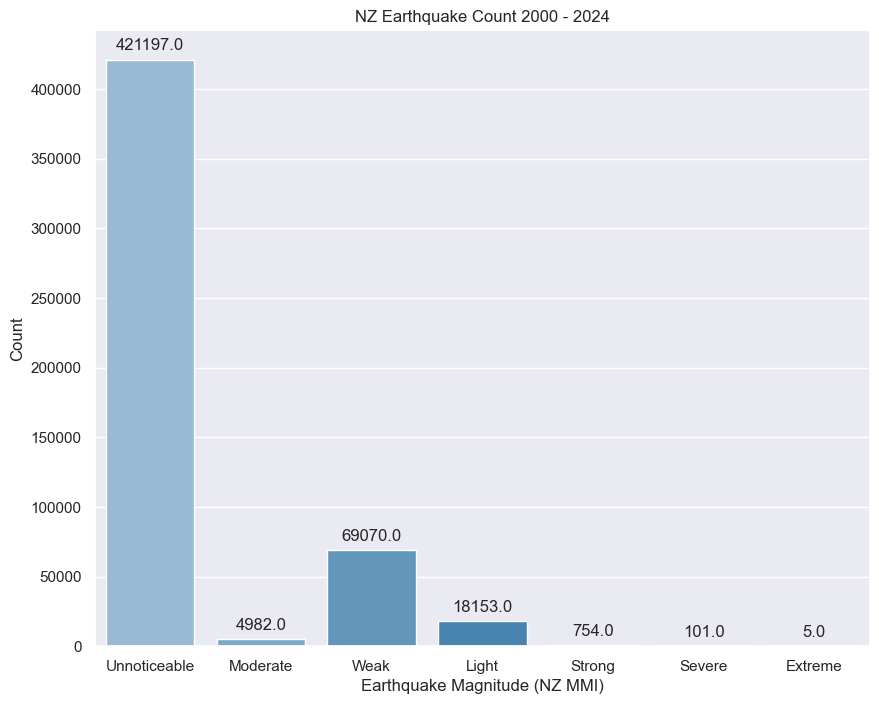

In [5]:
####################################################
# Investigating number of NZ MMI type occurrences throughout the studied time frame 
# NZ MMI = New Zealand Modified Mercalli Intensity Scale 
#          ('Unnoticeable, Weak, Light, Moderate, Strong, Severe, Extreme')
#          The data has been grouped accordingly in the data prep stage /notebook
####################################################

# Seaborn style 
sns.set(style="darkgrid")

# Create the count plot
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="NZ_MMI", data=df_quake_cty, palette="Blues_d")

# Layout - title and labels
plt.title('NZ Earthquake Count 2000 - 2024')
plt.ylabel('Count')
plt.xlabel('Earthquake Magnitude (NZ MMI)')

# Adding total counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Save the plot as an image file
plt.savefig('NZ Earthquake Count 2000 - 2024_All.png', dpi=300)

####################################################
# Plot output
plt.show()

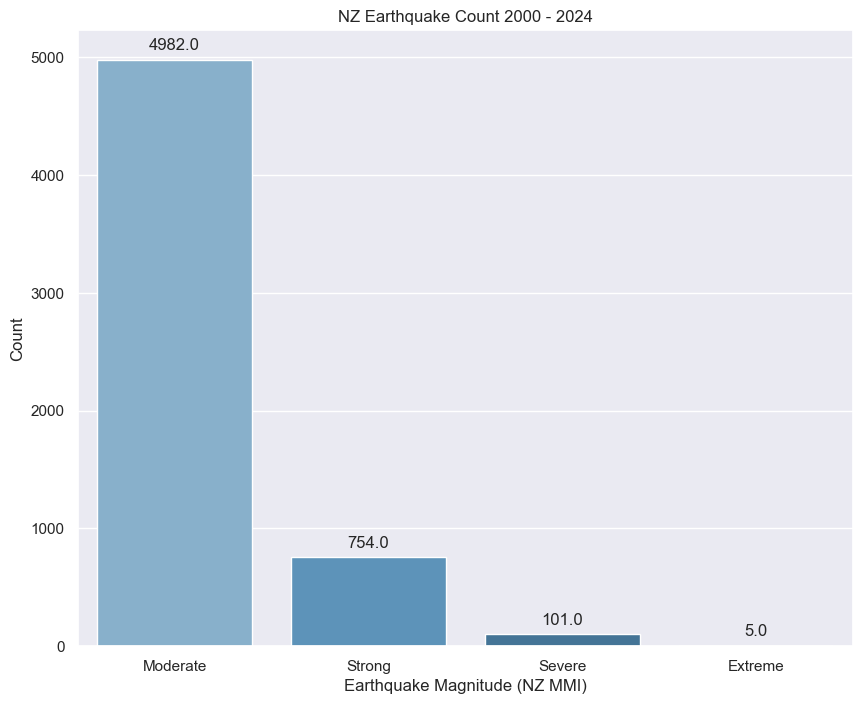

In [6]:
####################################################
# Investigating number of NZ MMI type occurrences throughout the studied time frame 
# filtered version that excludes the 'Unnoticed' to 'Light' categories
####################################################

# Filter the DataFrame to exclude 'Unnoticed' to 'Moderate' categories
filtered_df = df_quake_cty[~df_quake_cty['NZ_MMI'].isin(['Unnoticeable', 'Weak', 'Light'])]

# Setting up a count plot
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="NZ_MMI", data=filtered_df, palette="Blues_d")

# Layout - title and labels
plt.title('NZ Earthquake Count 2000 - 2024')
plt.ylabel('Count')
plt.xlabel('Earthquake Magnitude (NZ MMI)')

# Adding total counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Save the plot as an image file
plt.savefig('NZ Earthquake Count 2000 - 2024_Mod-Ext.png', dpi=300)

####################################################
# Plot output
plt.show()

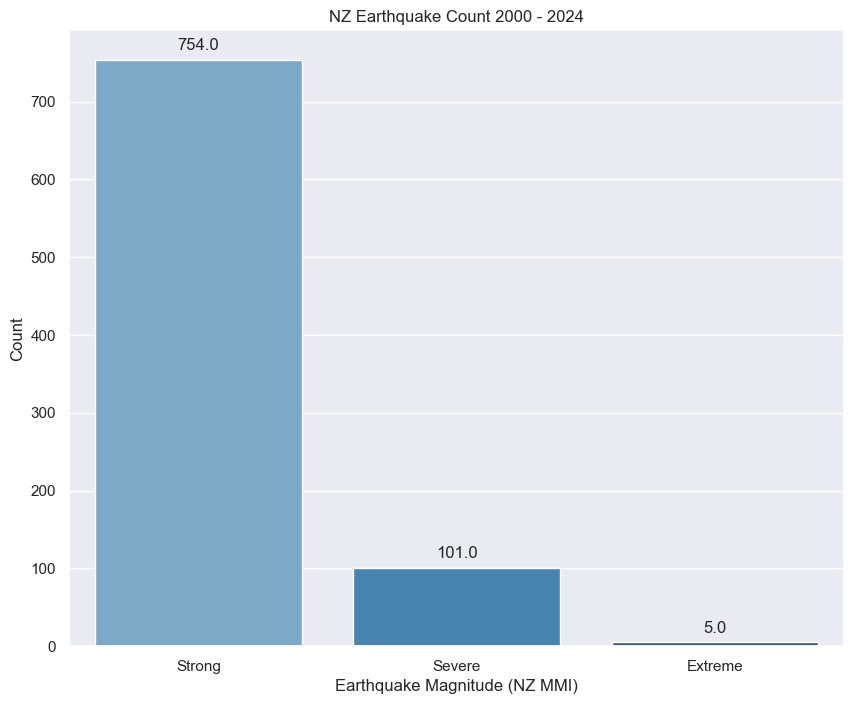

In [7]:
####################################################
# Investigating number of NZ MMI type occurrences throughout the studied time frame 
# filtered version that excludes the 'Unnoticed' to 'Moderate' categories
####################################################

# Filter the DataFrame to exclude 'Unnoticed' to 'Moderate' categories
filtered_df = df_quake_cty[~df_quake_cty['NZ_MMI'].isin(['Unnoticeable', 'Weak', 'Light', 'Moderate'])]

# Setting up a count plot
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="NZ_MMI", data=filtered_df, palette="Blues_d")

# Layout - title and labels
plt.title('NZ Earthquake Count 2000 - 2024')
plt.ylabel('Count')
plt.xlabel('Earthquake Magnitude (NZ MMI)')

# Adding total counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Save the plot as an image file
plt.savefig('NZ Earthquake Count 2000 - 2024_Str-Ext.png', dpi=300)

####################################################
# Plot output
plt.show()

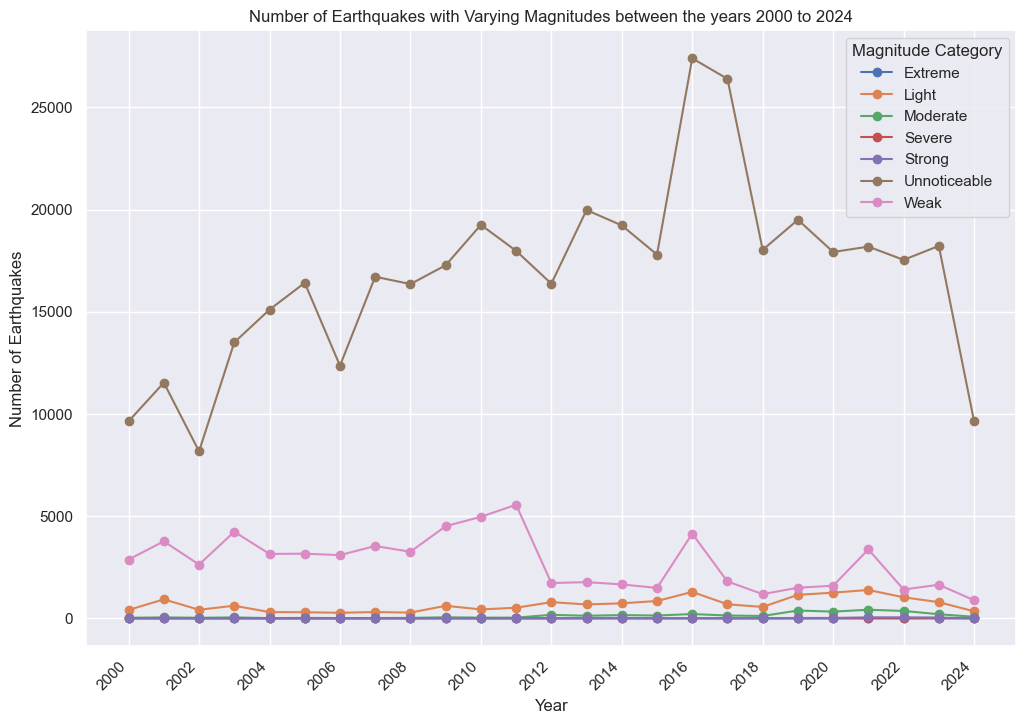

In [8]:
import matplotlib.pyplot as plt

####################################################
# Count number of quakes (NZ MMI grouped) as line plot
####################################################

# Create new column for the year
df_quake_cty['Year'] = df_quake_cty['Time'].dt.year

# Grouping the data by years and magnitude category and count number of quakes
yearly_counts = df_quake_cty.groupby(['Year', 'NZ_MMI']).size().unstack().fillna(0).round(0)

# Plot the time series
fig, ax = plt.subplots(figsize=(12, 8))
yearly_counts.plot(kind='line', marker='o', ax=ax)

# Set x-ticks to every two years
years = yearly_counts.index.astype(int)
ax.set_xticks(years[::2])  # Set ticks at every second year
ax.set_xticklabels(years[::2], rotation=45, ha='right')  # Display years as integers

# Layout - Title and labels
plt.title('Number of Earthquakes with Varying Magnitudes between the years 2000 to 2024')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.legend(title='Magnitude Category')
plt.grid(True)

# Save the plot as an image file
plt.savefig('Earthquake_Variance_2000-2024.png', dpi=300)
####################################################
# Plot output
plt.show()

/Users/derphantomben/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/derphantomben/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/derphantomben/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/derphantomben/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and

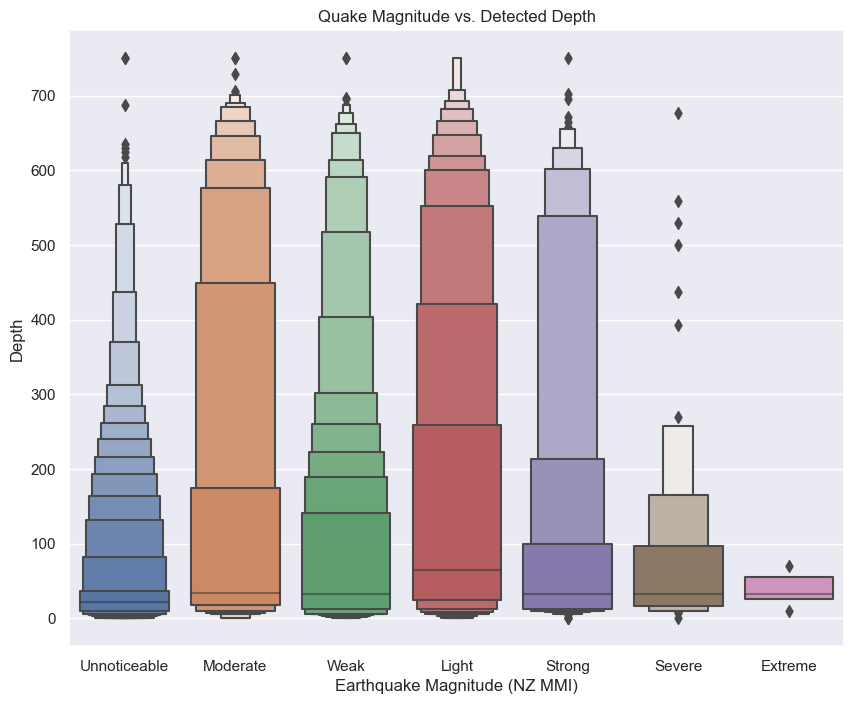

In [9]:
####################################################
# Exploring Earthquake Magnitude vs Depth
####################################################

# Setting up a boxenplot
plt.figure(figsize=(10,8))
sns.boxenplot(x='NZ_MMI', y='Depth', data=df_quake_cty, scale="linear")

# Layout - title and labels
plt.title('Quake Magnitude vs. Detected Depth')
plt.ylabel('Depth')
plt.xlabel('Earthquake Magnitude (NZ MMI)')

# Save the plot as an image file
plt.savefig('MagnitudeVs.Depth.png', dpi=300)
####################################################
# Plot output
plt.show();

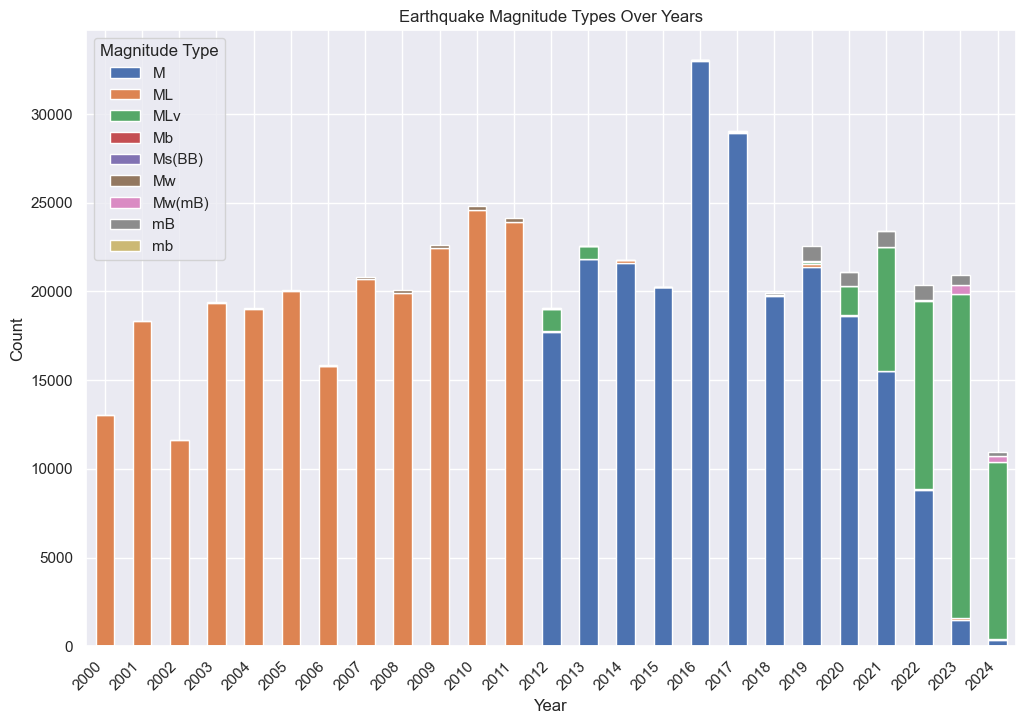

In [10]:
####################################################
# Grouping the data by year and magnitude type and count the number of Earthquakes
####################################################

type_counts = df_quake_cty.groupby(['Year', 'Magnitude Type']).size().unstack().fillna(0)

# Plot stacked diagram 
fig, ax = plt.subplots(figsize=(12, 8))
type_counts.plot(kind='bar', stacked=True, ax=ax)

# Format the x-axis to display the actual years as integers
ax.set_xticks(range(len(type_counts.index))) # for correct display of years without digits
ax.set_xticklabels(type_counts.index.astype(int), rotation=45, ha='right')

# Layout - Titles and labels
plt.title('Earthquake Magnitude Types Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Magnitude Type')
plt.grid(True)

# Save the plot as an image file
plt.savefig('MagnitudeTypes_2000-2024.png', dpi=300)

####################################################
# Plot output
plt.show()

Observation:

shift from predominantly local magnitude (ML) magnitude type from 2000 - 2011
to the moment magnitude (M) after that until 2020 which is often more reliable for larger earthquakes,
as it measures the seismic energy released more comprehensively --> The moment magnitude scale might provide better consistency for the agency's long-term data records --> the shift may likely be a move that mirros that of other agencies internationally as many of them moved to the moment magnitude --> This broader transition is perhaps related to developments in research an dsubsequent regolatory changes --> and may produce greater data consistency longterm
The shift from ML to M in the dataset reflects a strategic decision by the agency to adopt more accurate and standardized measurement practices. --> interestingly this decisision was made in the wake of the 2011 Kaikoura event that destoyed Christchurch

/Users/derphantomben/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


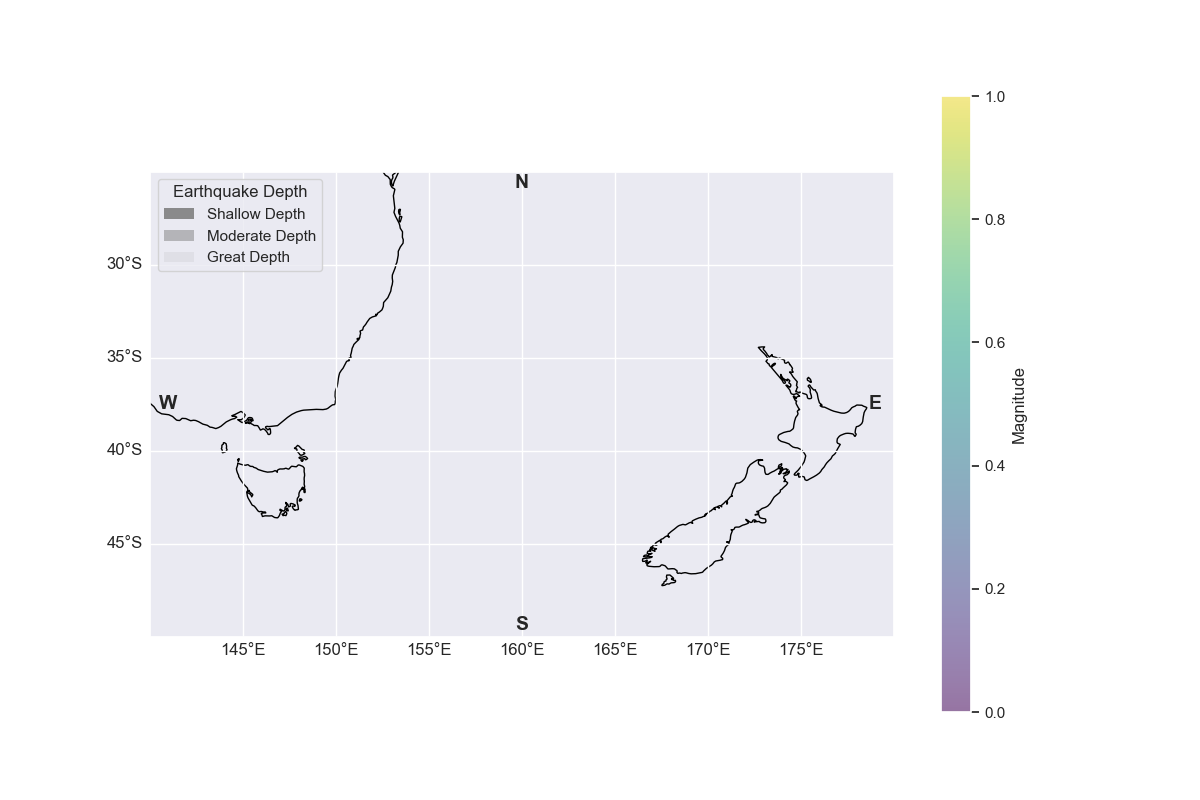

In [15]:
###################################################
# Interactive scatter plot of spatial-temporally clustered earthquake data (automated animation)
###################################################

# Magic command to run animation in Jupyter
%matplotlib widget

# Sample frames initialization (unique clusters)
frames = df_major_quakes['Cluster'].unique()

# Initial cluster selection
initial_cluster = frames[0]

###################################################
# Update the scatter plot function

def update(frame):
    # Clear the scatter plot
    scatter.set_offsets(np.empty((0, 2)))
    scatter.set_array(np.array([]))
    
    # Update the data in the scatter plot
    current_data = df_major_quakes[df_major_quakes['Cluster'] == frame]
    
    # If there's no data, skip this frame
    if current_data.empty:
        return scatter,
    
    # Update scatter plot properties
    scatter.set_offsets(current_data[['Longitude', 'Latitude']])
    scatter.set_array(current_data['Magnitude'])
    
    # Update opacity based on depth
    min_depth = current_data['Depth'].min()
    max_depth = current_data['Depth'].max()
    
    if pd.isna(min_depth) or pd.isna(max_depth):
        opacity = 0.1  # Default opacity if no valid depth is available
    else:
        opacity = 0.5 * (1 - (current_data['Depth'] - min_depth) / (max_depth - min_depth)) + 0.1
    
    # Replace NaN values with default opacity
    opacity = np.where(np.isnan(opacity), 0.5, opacity)
    
    # Ensure opacity values are within the range [0, 1]
    opacity = np.clip(opacity, 0, 1)
    scatter.set_alpha(opacity)

    # Get the minimum and maximum magnitudes for setting the color scale
    min_magnitude = current_data['Magnitude'].min()
    max_magnitude = current_data['Magnitude'].max()
    
    # Update the color scale based on the current frame's magnitudes
    scatter.set_clim(min_magnitude, max_magnitude)

    # Update the title to show the identified earthquake cluster and date range
    start_date = current_data['Time'].min().strftime("%Y-%m-%d %H:%M:%S")
    end_date = current_data['Time'].max().strftime("%Y-%m-%d %H:%M:%S")
    ax.set_title(f'Identified Earthquake Cluster {frame} in Date Range: {start_date} to {end_date}')
    return scatter,

###################################################
# Base figure and axis

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Setting outcrop to include the Tasman Sea to the Tasmanian/Australian coast (west) and the Hikurangi Trench (east)
ax.set_extent([140, 180, -50, -25], crs=ccrs.PlateCarree())

# Plotting New Zealand, Australia, and Tasmania coastlines for reference 
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Define the initial scatter plot (empty)
scatter = ax.scatter([], [], c=[], cmap='viridis', alpha=0.5, edgecolor='w', s=100, transform=ccrs.PlateCarree())

# Colorbar (magnitudes)
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude')

# Cardinal directions 
ax.text(0.5, 0.975, 'N', transform=ax.transAxes, ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.5, 0.025, 'S', transform=ax.transAxes, ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.025, 0.5, 'W', transform=ax.transAxes, ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.975, 0.5, 'E', transform=ax.transAxes, ha='center', va='center', fontsize=14, fontweight='bold')

# Add a legend for depth opacity
legend_handles = [
    Rectangle((0, 0), 1, 1, facecolor='gray', alpha=0.9, edgecolor='none', label='Shallow Depth'),
    Rectangle((0, 0), 1, 1, facecolor='gray', alpha=0.5, edgecolor='none', label='Moderate Depth'),
    Rectangle((0, 0), 1, 1, facecolor='gray', alpha=0.1, edgecolor='none', label='Great Depth')]

ax.legend(handles=legend_handles, loc='upper left', title='Earthquake Depth')

###################################################
# Animation setup

# Interval between frames (milliseconds)
interval = 500

ani = animation.FuncAnimation(fig, update, frames=frames, interval=interval, repeat=True)

# Display the animation
plt.show()

Dropdown(description='Cluster:', options=(1, 12, 7, 9, 6, 2, 35, 443, 3, 475, 4, 27, 0, 81, 15, 476, 131, 446,…

(<matplotlib.collections.PathCollection at 0x13dd3b710>,)

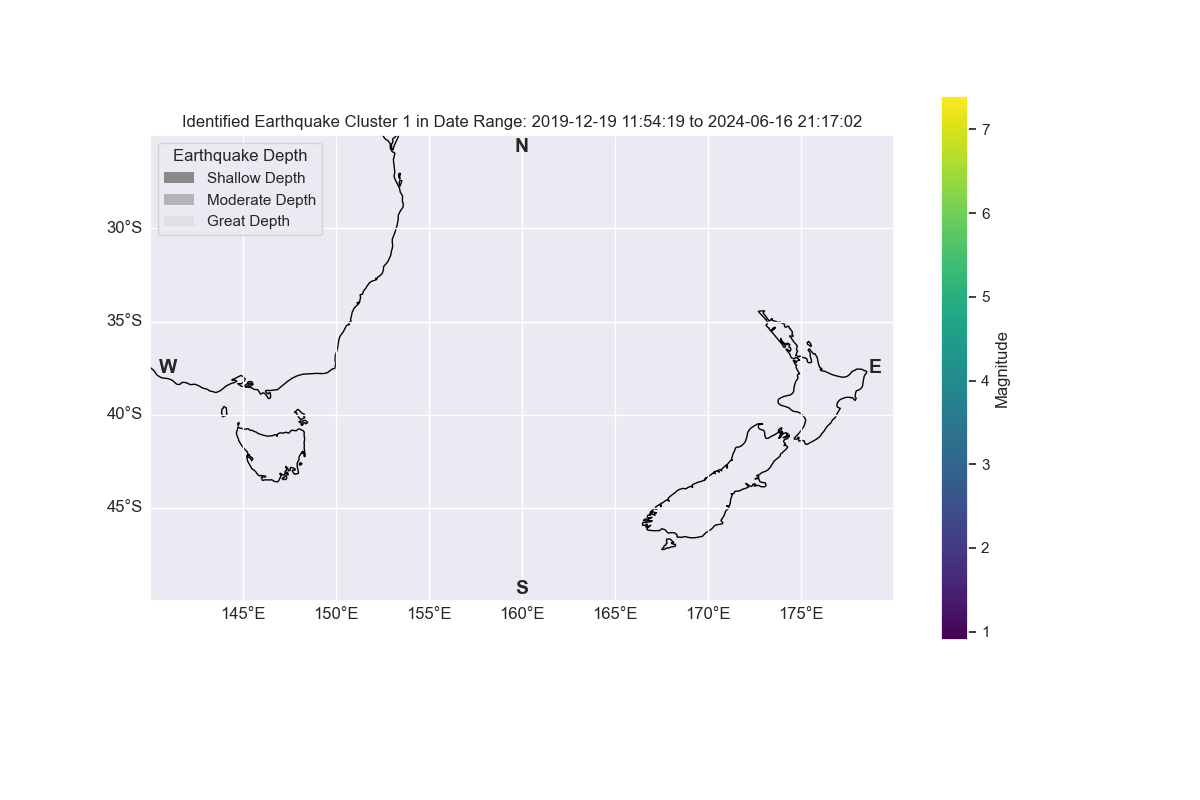

In [12]:
###################################################
# Interactive scatter plot of spatial-temporally clustered earthquake data (with drop down menu)
###################################################

# Sample frames initialization (unique clusters)
frames = df_major_quakes['Cluster'].unique()

# Initial cluster selection
initial_cluster = frames[0]

###################################################
# Function to update the scatter plot

def update(frame):
    # Clear the scatter plot
    scatter.set_offsets(np.empty((0, 2)))
    scatter.set_array(np.array([]))
    
    # Update the data in the scatter plot
    current_data = df_major_quakes[df_major_quakes['Cluster'] == frame]
    
    # If there's no data, skip this frame
    if current_data.empty:
        return scatter,
    
    # Update scatter plot properties
    scatter.set_offsets(current_data[['Longitude', 'Latitude']])
    scatter.set_array(current_data['Magnitude'])
    
    # Update opacity based on depth
    min_depth = current_data['Depth'].min()
    max_depth = current_data['Depth'].max()
    
    if pd.isna(min_depth) or pd.isna(max_depth):
        opacity = 0.1  # Default opacity if no valid depth is available
    else:
        opacity = 0.5 * (1 - (current_data['Depth'] - min_depth) / (max_depth - min_depth)) + 0.1
    
    # Replace NaN values with default opacity
    opacity = np.where(np.isnan(opacity), 0.5, opacity)
    
    # Ensure opacity values are within the range [0, 1]
    opacity = np.clip(opacity, 0, 1)
    scatter.set_alpha(opacity)

    # Get the minimum and maximum magnitudes for setting the color scale
    min_magnitude = current_data['Magnitude'].min()
    max_magnitude = current_data['Magnitude'].max()
    
    # Update the color scale based on the current frame's magnitudes
    scatter.set_clim(min_magnitude, max_magnitude)

    # Update the title to show the identified earthquake cluster and date range
    start_date = current_data['Time'].min().strftime("%Y-%m-%d %H:%M:%S")
    end_date = current_data['Time'].max().strftime("%Y-%m-%d %H:%M:%S")
    ax.set_title(f'Identified Earthquake Cluster {frame} in Date Range: {start_date} to {end_date}')
    return scatter,

###################################################
# Creating the dropdown menu

def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update(change['new'])

# Dropdown widget for interactive cluster selection
cluster_selector = widgets.Dropdown(
    options=frames,
    value=initial_cluster,
    description='Cluster:')

# Update function for the dropdown widget
cluster_selector.observe(on_dropdown_change)

###################################################
# Setting up the base figure and axis

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Setting outcrop to include the Tasman Sea to the Tasmanian/Australian coast (west) and the Hikurangi Trench (east)
ax.set_extent([140, 180, -50, -25], crs=ccrs.PlateCarree())

# Plotting New Zealand, Australia, and Tasmania coastlines for reference 
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.top_labels = False
gl.right_labels = False

# Define the initial scatter plot (empty)
scatter = ax.scatter([], [], c=[], cmap='viridis', alpha=0.5, edgecolor='w', s=100, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude')

# Add cardinal directions within the plot
ax.text(0.5, 0.975, 'N', transform=ax.transAxes, ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.5, 0.025, 'S', transform=ax.transAxes, ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.025, 0.5, 'W', transform=ax.transAxes, ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.975, 0.5, 'E', transform=ax.transAxes, ha='center', va='center', fontsize=14, fontweight='bold')

# Add a legend for depth opacity
legend_handles = [
    Rectangle((0, 0), 1, 1, facecolor='gray', alpha=0.9, edgecolor='none', label='Shallow Depth'),
    Rectangle((0, 0), 1, 1, facecolor='gray', alpha=0.5, edgecolor='none', label='Moderate Depth'),
    Rectangle((0, 0), 1, 1, facecolor='gray', alpha=0.1, edgecolor='none', label='Great Depth')]

ax.legend(handles=legend_handles, loc='upper left', title='Earthquake Depth')

###################################################
# Show the plot

plt.subplots_adjust(bottom=0.2)
display(cluster_selector)
update(initial_cluster)

**Cluster ID:** Each unique integer value (e.g., cluster value 188) represents a different cluster of earthquakes. 

**Noise Points:** If a cluster has a value of -1. This indicates that the event is considered noise, meaning it did not belong to any cluster.

/Users/derphantomben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


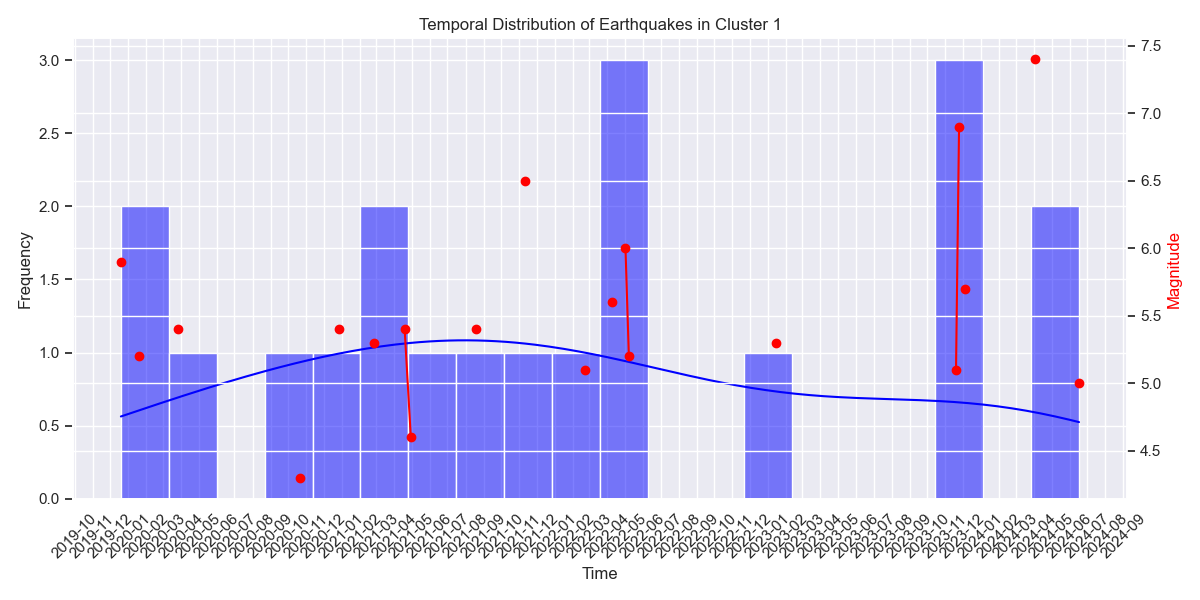

Dropdown(description='Cluster:', options=(1, 12, 7, 9, 6, 2, 35, 443, 3, 475, 4, 27, 0, 81, 15, 476, 131, 446,…

In [14]:
###################################################
# Create tempo-spatial graph with earthquake frequency per cluster plotted against measured magnitudes (with drop down menu)
###################################################

# Function to update the plot

def update_plot(cluster):
    plt.clf()
    cluster_data = df_major_quakes[df_major_quakes['Cluster'] == cluster]
    
    # Plot the histogram
    sns.histplot(cluster_data['Time'], bins=20, kde=True, color='blue')
    plt.title('Temporal Distribution of Earthquakes in Cluster {}'.format(cluster))
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    
    # Plot the magnitude line plot
    plt.twinx()
    plt.plot(cluster_data['Time'], cluster_data['Magnitude'], color='red', marker='o', linestyle='-')
    plt.ylabel('Magnitude', color='red')
    
    plt.tight_layout()
    plt.show()

###################################################
# Find and extract the unique cluster identifiers from the dataframe

frames = df_major_quakes['Cluster'].unique()

###################################################
# Base figure

fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(bottom=0.2)
initial_cluster = frames[0]
update_plot(initial_cluster)

###################################################
# Dropdown widget for interactive cluster selection

cluster_selector = widgets.Dropdown(
    options=frames,
    value=initial_cluster,
    description='Cluster:')

# Update function for the widget
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        update_plot(change['new'])

cluster_selector.observe(on_change)

###################################################
# Output graph
display(cluster_selector)